# Telco Churn Prediciton 

Pada pemodelan meachine learning menggunakan dataset ***telco_churn*** untuk memprediksi custumer yang churn dan tidak churn.

Sumber data set:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data Cleaning, Visualize & Model prediction.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
#import dataset
df_homework = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PORTOFOLIO/telco_churn.csv")
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##**0.Data understanding**

Menampilkan data telco_churn

In [20]:
df_homework

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Menampilkan jumlah baris dan kolom pada data homework

In [21]:
df_homework.shape

(7043, 21)

##**1.Handle Missing Value and Duplicated Rows**

###1.1 Melakukan pengecekan kemungkinan kolom yang identik.

In [22]:
#Code untuk menampilkan nama-nama kolom
df_homework.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df_homework.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [25]:
df_homework.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3196,4393-OBCRR,Female,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.25,71.2,No
6031,0282-NVSJS,Female,1,Yes,Yes,12,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,29.30,355.9,No
5895,8033-ATFAS,Female,0,Yes,Yes,39,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,59.85,2341.5,No
3447,9762-YAQAA,Male,0,No,No,39,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,No,Credit card (automatic),81.40,3213.75,No
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3,No
1750,4137-JOPHL,Female,0,No,No,50,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),89.70,4304.5,No
1349,2625-TRCZQ,Female,0,Yes,No,51,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.65,2553.35,No
4630,1852-XEMDW,Male,0,No,No,22,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,65.05,1427.55,No
5854,7876-BEUTG,Female,0,No,No,15,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,48.80,720.1,No


Berdasarkan hasil uji dengan menampilkan nama-nama kolom serta pengecekan manual, ditemukan indikasi kesamaan antara kolom "Streaming TV" dan "Streaming Movie". Dari hal tersebut, maka dilakukan uji lanjutan dengan melihat data secara detail dari kedua kolom tersebut.

In [26]:
#Jumlah nilai-nilai berdasarkan kategori pada kolom streaming TV
df_homework['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [27]:
#Jumlah nilai-nilai berdasarkan kategori pada kolom streaming movies
df_homework['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

Berdasarkan hasil analis uji lanjutan, maka ditemukan bahwa kedua kolom memiliki perbedaan. Sehingga dapat diasumsikan bahwa dataset 'homework'.

###1.2 Melakukan pengecekan kemungkinan baris yang identik.

1.2.1 Mengecek baris duplikat 

In [28]:
df_homework.duplicated().sum()

0

Dari hasil tersebut, ditemukan bahwa tidak terdapat baris yang duplikat.

###2.1 Menangani Missing value

Mengecek missing value "Null"

In [29]:
df_homework.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [30]:
df_homework.notnull().sum()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

####2.1.1 Mengecek kolom dengan sifat numberik, untuk melihat kemungkinan terjadinya "missing value".

In [31]:
df_numerical = df_homework.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [32]:
df_homework.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berdasarkan pengamatan, seharusnya terdapat 4 kolom yang memiliki nilai kateogri numberic, teapi hasil yang didapatkan hanya ada 3 kolom. Maka kolom "TotalCharges" akan dilakukan identifikasi lanjut, untuk mengecek kemungkinan terjadi missing value.

Import math Library untuk mengecek data apakah is.NaN atau tidak sesuai dengan karakteristik tiap kolom.


In [33]:
# Import math Library
import math

In [34]:
#Membuat duplikat dari kolom TotalChargers untuk dilakukan infestigasi lebih lanjut.
TotalChargersCek = df_homework['TotalCharges']
TotalChargersCek.sample

<bound method NDFrame.sample of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [35]:
type(TotalChargersCek)

pandas.core.series.Series

In [36]:
TotalChargersCek.sum()

'29.851889.5108.151840.75151.65820.51949.4301.93046.053487.95587.45326.85681.15036.32686.057895.151022.957382.25528.351862.939.65202.2520.153505.12970.31530.64749.1530.26369.451093.16766.95181.651874.4520.245.257251.7316.93548.33549.251105.4475.74872.35418.254861.45981.453906.797144.154217.84254.13838.751426.41752.65633.34456.351752.556311.27076.35894.37853.74707.15450.72962957.1857.25244.13650.352497.2930.9887.3549.051090.6570991424.6177.46139.52688.85482.252111.31216.679.35565.35496.94327.5973.35918.752215.451057927.11009.252570.274.75714.2571077459.05927.354748.7113.851107.22514.520.219.453605.63027.257611.85100.27303.05927.653921.31363.255238.93042.253954.12868.153423.5248.41126.351064.65835.152151.65515.45112.75229.55350.3562.93027.652135.51723.9519.753985.351215.651502.653260.135.4581.251188.21778.51277.751170.5570.456425.65563.655971.255289.051756.26416.761.3545.651929.951071.4564.35655.57930.555215.25113.51152.81821.95419.91024251.6764.551592.35135.23958.25233.91363.452736254.4

In [37]:
#Membuat duplikat dari kolom TotalChargersCek untuk untuk modifikasi type data.
seriesToFloat = pd.Series([TotalChargersCek])
type(seriesToFloat)

pandas.core.series.Series

In [38]:
pd.to_numeric(seriesToFloat, errors='coerce')

0   NaN
dtype: float64

In [39]:
seriesToFloat[0]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [40]:
#Mengecek Kolom seriesToFloat menggunakan pandas
print(f"It's pd.isna  : {pd.isna(seriesToFloat)}")

It's pd.isna  : 0    False
dtype: bool


In [41]:
def isNaN(num):
    return num!= num
x=seriesToFloat[0]
isNaN(x)


0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [42]:
x.value_counts().sample(10)

6921.7     1
605.9      1
5043.2     1
3371.75    1
3686.05    1
1334       1
4039.5     1
740.3      2
610.75     1
2028.8     1
Name: TotalCharges, dtype: int64

In [43]:
x[1610]

'3121.45'

Dari hasil identifikasi awal terhadap kolom "TotalCharges", belum ditemukan keberadaan NaN.

Untuk menjaga data pada df_homework tetap seperti semula, maka dibuat data frame baru yang merupakan duplikat dari df_homework untuk dilakukan cleaning.

In [44]:
df_homework_clean = df_homework

In [45]:
df_homework_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
#Code untuk mengecek kolom TotalCharges, jika terdapat koma (,) maka akan dihapus!
df_homework_clean["TotalCharges"] = df_homework_clean['TotalCharges'].str.replace(',', '') 
#Code untuk mengecek kolom TotalCharges, jika terdapat spasi kosong ( ) maka akan dihapus!
df_homework_clean["TotalCharges"] = df_homework_clean['TotalCharges'].str.replace(' ', '')

In [47]:
#Code untuk mengecek kembali baris-baris pada kolom yang kosong, maka akan dilakukan imputate sebagai NaN!
df_homework_clean["TotalCharges"] = df_homework_clean["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [48]:
#Mengecek Kolom TotalCharges menggunakan pandas
print(f"It's pd.isna  : {pd.isna(df_homework_clean['TotalCharges']).sum()}")

It's pd.isna  : 11


Setelah beberapa kali percobaan!!!, akhinya ditemukan bahwa pada kolom TotalCharges terdapat 11 baris yang memiliki data NaN!

In [49]:
sum_totalCharges = 0
for z in df_homework_clean['TotalCharges']:
  if pd.isna(z) == False:
   sum_totalCharges += float(z)

print(f"Jumlah rata-rata dari nilai pada kolom TotalCharges : {sum_totalCharges/7043-11}")

Jumlah rata-rata dari nilai pada kolom TotalCharges : 2268.734303563826


TotalCharges merupakan kolom yang menunjukkan total biaya pelanggan, sehingga tidak bisa dilakukan imputation menggunakan metode modus. Maka untuk mengisi data-data kosong pada kolom TotalCharges menggunakan metode Mean/rata-rata.

In [50]:
#Code untuk melakukan imputation terhadap baris-baris yang memiliki nilai na pada kolom TotalCharges
df_homework_clean["TotalCharges"] = df_homework_clean["TotalCharges"].fillna(2268.73)

In [51]:
#Mengecek Kolom TotalCharges menggunakan pandas
print(f"It's pd.isna  : {pd.isna(df_homework_clean['TotalCharges']).sum()}")

It's pd.isna  : 0


Missing value (na) pada kolom TotalCharges telah ditangani.

In [52]:
#Code ini untuk mengkonfersi tipe data string ke tipe data numberic pada kolom TotalCharges
df_homework_clean['TotalCharges'] = pd.to_numeric(df_homework_clean['TotalCharges'], errors='coerce')

In [53]:
df_numerical1 = df_homework_clean.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


Kolom 'TotalCharges' sudah menjadi kelompok data numberic.

####2.1.2 Mengecek kolom dengan sifat categorical, untuk melihat kemungkinan terjadinya "missing value".

In [54]:
df_categorical = df_homework_clean.select_dtypes(exclude=["int","float"])
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


#####2.1.2.1 Kolom 'Gender'

In [55]:
df_homework_clean['gender'].sample(25)

2580    Female
4548    Female
2119      Male
4809    Female
4785      Male
5954      Male
548       Male
6371    Female
4384    Female
5285    Female
1059      Male
5716      Male
6196      Male
158       Male
2541    Female
3726      Male
4093    Female
950       Male
4560      Male
2074    Female
3016    Female
1159    Female
621     Female
42      Female
4050      Male
Name: gender, dtype: object

In [56]:
df_homework_clean['gender'].value_counts(normalize = True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom gender tidak memiliki kategori lain selain 'Male' dan 'Female'. Maka kolom tersebut aman!

#####2.1.2.2 Kolom 'Partner'

In [57]:
df_homework_clean['Partner'].sample(25)

2444     No
5603     No
5969     No
6822    Yes
2614    Yes
6529     No
2118    Yes
1548    Yes
5909     No
4725     No
2427     No
6325    Yes
6338     No
4079    Yes
3117    Yes
5506     No
4630     No
5226    Yes
1256    Yes
1341     No
6125    Yes
5338    Yes
2281     No
1968     No
1688     No
Name: Partner, dtype: object

In [58]:
df_homework_clean['Partner'].value_counts(normalize = True)

No     0.516967
Yes    0.483033
Name: Partner, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom partner tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.3 Kolom 'Dependents'

In [59]:
df_homework_clean['Dependents'].sample(25)

4697     No
5627     No
2654     No
4178    Yes
5268    Yes
3567    Yes
3096     No
2621     No
116      No
5726    Yes
6778    Yes
6583     No
236      No
6707     No
1961     No
4413     No
1863     No
1756     No
5457    Yes
6115    Yes
1265    Yes
1337     No
99       No
4868     No
2823     No
Name: Dependents, dtype: object

In [60]:
df_homework_clean['Dependents'].value_counts(normalize = True)

No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom dependents tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.4 Kolom 'PhoneService'

In [61]:
df_homework_clean['Dependents'].sample(25)

696      No
6670    Yes
3810    Yes
2967     No
3758     No
3843     No
6729    Yes
310      No
3409     No
426      No
2378     No
2437     No
1483    Yes
2955     No
6039     No
1613     No
1024     No
4174     No
3708     No
6286    Yes
1163     No
2715     No
4643     No
636      No
1771     No
Name: Dependents, dtype: object

In [62]:
df_homework_clean['PhoneService'].value_counts(normalize = True)

Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64

Berdasarkan hasil pengecekan, dapat dilihat pada kolom PhoneService tidak memiliki kategori lain selain 'No' dan 'Yes'. Maka kolom tersebut aman!

#####2.1.2.5 Kolom 'MultipleLines'

In [63]:
df_homework_clean['MultipleLines'].sample(25)

5523                  No
5856                  No
6611                 Yes
5033                  No
914                  Yes
2871                 Yes
2932                 Yes
3878                 Yes
1516                 Yes
1887                 Yes
3315                 Yes
5098                 Yes
2694                  No
2373                  No
2180                  No
4796                  No
1683                  No
3419                  No
1650                 Yes
3084                  No
3954                 Yes
2097                  No
3174    No phone service
1234                  No
5083                  No
Name: MultipleLines, dtype: object

In [64]:
df_homework_clean['MultipleLines'].value_counts(normalize = True)

No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64

Dari hasil infestigasi, ditemukan 3 kateogri yaitu 'Yes', 'No', dan 'No phone service'. Kolom Multiple Lines: Menunjukkan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan: Ya, Tidak. Berdasarkan defenisi tersebut, maka 'No phone service' memiliki nilai/tujuan yang sama dengan 'No'. 

In [65]:
df_homework_clean['MultipleLines'] = df_homework_clean['MultipleLines'].str.replace('No phone service', 'No')

In [66]:
df_homework_clean['MultipleLines'].value_counts(normalize = True)

No     0.578163
Yes    0.421837
Name: MultipleLines, dtype: float64

Kolom 'MultipleLines' Aman!

#####2.1.2.6 Kolom 'InternetService'

In [67]:
df_homework_clean['InternetService'].sample(25)

6136             No
2714    Fiber optic
6167    Fiber optic
4644            DSL
6175    Fiber optic
370              No
6677            DSL
2425             No
2288    Fiber optic
3628            DSL
3292            DSL
1673    Fiber optic
4929            DSL
3286    Fiber optic
3797            DSL
2956    Fiber optic
1046            DSL
4039    Fiber optic
1770    Fiber optic
4030            DSL
2437            DSL
6599    Fiber optic
5288    Fiber optic
2136    Fiber optic
1562            DSL
Name: InternetService, dtype: object

In [68]:
df_homework_clean['InternetService'].value_counts(normalize = True)

Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64

Berdasarkan penjelasan kolom tersebut, seharusnya Internet service memiliki kateogri No, DSL, Fiber Optic, Cable. Sehingga dilakukan uji lanjut berupa pengecekan isnull dan jumlah presentase dari gabungan kateogri-kategori diatas.

In [69]:
df_homework_clean['InternetService'].isnull().sum()

0

In [70]:
0.439585 + 0.343746 + 0.216669

1.0

Dari ketika kateogri tersebut, jika digabungkan semuanya maka total 1.0. Sehingga dapat disimpulkan data pada kolom InernetService sudah semunya terbagi kedalam ketiga kateogori tersebut.

#####2.1.2.7 Kolom 'OnlineSecurity'

In [71]:
df_homework_clean['OnlineSecurity'].sample(25)

842     No internet service
3382    No internet service
6451                    Yes
2525                    Yes
1073                     No
6988                     No
5212                    Yes
3268                    Yes
4090                    Yes
5711                     No
2682                     No
6696                     No
5317                     No
962                     Yes
176                      No
6359                     No
3695                     No
3818                    Yes
5307                     No
1765                    Yes
2930    No internet service
2093    No internet service
3865    No internet service
318                      No
3032    No internet service
Name: OnlineSecurity, dtype: object

In [72]:
df_homework_clean['OnlineSecurity'].value_counts(normalize = True)

No                     0.496663
Yes                    0.286668
No internet service    0.216669
Name: OnlineSecurity, dtype: float64

Berdasarkan penjelasan dataset, seharusnya kolom OnlineSecurity hanya memiliki dua kategori yaitu Yes / No. Maka berdasarkan tujuan dari kolom ini yaitu untuk menujukan bahwa pelanggan berlangganan layanan tambahan Online Security atau tidak. Maka kateogori 'No internet service' dimasukan kedalam kateogri 'No'

In [73]:
df_homework_clean['OnlineSecurity'] = df_homework_clean['OnlineSecurity'].str.replace('No internet service', 'No')

In [74]:
df_homework_clean['OnlineSecurity'].value_counts(normalize = True)

No     0.713332
Yes    0.286668
Name: OnlineSecurity, dtype: float64

Data pada kolom 'Online Security' Aman!

#####2.1.2.8 Kolom 'OnlineBackup'

In [75]:
df_homework_clean['OnlineBackup'].sample(25)

532                      No
3904    No internet service
1623                    Yes
988     No internet service
1149                     No
1521                    Yes
1153                     No
2949                     No
2442                     No
1675                     No
3192    No internet service
5997                    Yes
2151    No internet service
5114                    Yes
6059                    Yes
5117                     No
1195                    Yes
999                      No
2055                     No
3304                    Yes
1586                     No
4477                     No
6690                     No
1413                    Yes
6847                     No
Name: OnlineBackup, dtype: object

In [76]:
df_homework_clean['OnlineBackup'].value_counts(normalize = True)

No                     0.438450
Yes                    0.344881
No internet service    0.216669
Name: OnlineBackup, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [77]:
df_homework_clean['OnlineBackup'] = df_homework_clean['OnlineBackup'].str.replace('No internet service', 'No')

In [78]:
df_homework_clean['OnlineBackup'].value_counts(normalize = True)

No     0.655119
Yes    0.344881
Name: OnlineBackup, dtype: float64

Data pada kolom 'OnlineBackup' aman!

#####2.1.2.9 Kolom 'DeviceProtection'

In [79]:
df_homework_clean['DeviceProtection'].sample(25)

3211    No internet service
3713                     No
4166    No internet service
756     No internet service
1104    No internet service
26                       No
5460    No internet service
6506                     No
5417                     No
5475                     No
2196    No internet service
843                      No
4654    No internet service
6487                     No
60                      Yes
5360                    Yes
3060                    Yes
2635    No internet service
4625                    Yes
5525    No internet service
866                      No
4044                    Yes
3618                     No
5065    No internet service
946     No internet service
Name: DeviceProtection, dtype: object

In [80]:
df_homework_clean['DeviceProtection'].value_counts(normalize = True)

No                     0.439443
Yes                    0.343888
No internet service    0.216669
Name: DeviceProtection, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [81]:
df_homework_clean['DeviceProtection'] = df_homework_clean['DeviceProtection'].str.replace('No internet service', 'No')

In [82]:
df_homework_clean['DeviceProtection'].value_counts(normalize = True)

No     0.656112
Yes    0.343888
Name: DeviceProtection, dtype: float64

Data pada kolom 'DeviceProtection' Aman!

#####2.1.2.10 Kolom 'TechSupport'

In [83]:
df_homework_clean['TechSupport'].sample(25)

3544                     No
895                      No
5429                    Yes
2909                    Yes
6600                     No
109     No internet service
1027                     No
3193    No internet service
6628                     No
3940                     No
1729                     No
4214                     No
4936                    Yes
5857                     No
5942                     No
4051                     No
6606                    Yes
4896                     No
2875                     No
519     No internet service
1758    No internet service
3016                     No
2516                     No
806                     Yes
6555    No internet service
Name: TechSupport, dtype: object

In [84]:
df_homework_clean['TechSupport'].value_counts(normalize = True)

No                     0.493114
Yes                    0.290217
No internet service    0.216669
Name: TechSupport, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [85]:
df_homework_clean['TechSupport'] = df_homework_clean['TechSupport'].str.replace('No internet service', 'No')

In [86]:
df_homework_clean['TechSupport'].value_counts(normalize = True)

No     0.709783
Yes    0.290217
Name: TechSupport, dtype: float64

Data pada kolom 'TechSupport' Aman!

#####2.1.2.10 Kolom 'StreamingTV'

In [87]:
df_homework_clean['StreamingTV'].sample(25)

593                      No
2261                     No
5641    No internet service
4034                     No
205                      No
6785                    Yes
5064                     No
4002                    Yes
1668                    Yes
4484                     No
4579                     No
4569                     No
5009                    Yes
5394                    Yes
1884                     No
1243                     No
675                     Yes
6821                    Yes
6745                    Yes
6166                    Yes
6837                    Yes
6082                    Yes
5941                     No
3401    No internet service
2660                     No
Name: StreamingTV, dtype: object

In [88]:
df_homework_clean['StreamingTV'].value_counts(normalize = True)

No                     0.398978
Yes                    0.384353
No internet service    0.216669
Name: StreamingTV, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [89]:
df_homework_clean['StreamingTV'] = df_homework_clean['StreamingTV'].str.replace('No internet service', 'No')

In [90]:
df_homework_clean['StreamingTV'].value_counts(normalize = True)

No     0.615647
Yes    0.384353
Name: StreamingTV, dtype: float64

Data pada kolom 'StreamingTV' Aman!

#####2.1.2.11 Kolom 'StreamingMovies'

In [91]:
df_homework_clean['StreamingMovies'].sample(25)

796                      No
6346                     No
5103                    Yes
3099    No internet service
3112                    Yes
3904    No internet service
2858    No internet service
1538                    Yes
3563                    Yes
4127    No internet service
5764                    Yes
4568                     No
5908    No internet service
4990                     No
3819                     No
3670    No internet service
5127                    Yes
4941    No internet service
3508                    Yes
3776                     No
296                      No
2756    No internet service
6982                    Yes
2424                    Yes
3520    No internet service
Name: StreamingMovies, dtype: object

In [92]:
df_homework_clean['StreamingMovies'].value_counts(normalize = True)

No                     0.395428
Yes                    0.387903
No internet service    0.216669
Name: StreamingMovies, dtype: float64

Seperti pada kasus kolom sebelumnya, maka kategori 'No internet service' akan dimasukan kedalam kategori 'No'.

In [93]:
df_homework_clean['StreamingMovies'] = df_homework_clean['StreamingMovies'].str.replace('No internet service', 'No')

In [94]:
df_homework_clean['StreamingMovies'].value_counts(normalize = True)

No     0.612097
Yes    0.387903
Name: StreamingMovies, dtype: float64

Data pada kolom 'StreamingMovies' Aman!

#####2.1.2.12 Kolom 'Contract'

In [95]:
df_homework_clean['Contract'].sample(25)

4896    Month-to-month
6836    Month-to-month
1158    Month-to-month
5909          One year
1293          Two year
6546    Month-to-month
2799          One year
1049    Month-to-month
5200          One year
67            Two year
3244    Month-to-month
2441    Month-to-month
620     Month-to-month
2769    Month-to-month
4769          One year
6191    Month-to-month
2648    Month-to-month
5332          One year
1671          One year
2163    Month-to-month
5085    Month-to-month
2760          One year
345     Month-to-month
5145          One year
6587    Month-to-month
Name: Contract, dtype: object

In [96]:
df_homework_clean['Contract'].value_counts(normalize = True)

Month-to-month    0.550192
Two year          0.240664
One year          0.209144
Name: Contract, dtype: float64

In [97]:
0.550192 + 0.240664 + 0.209144

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'Contract' Aman!

#####2.1.2.13 Kolom 'PaperlessBilling'

In [98]:
df_homework_clean['PaperlessBilling'].sample(25)

12       No
1780     No
6569     No
1580     No
2413     No
1168     No
6498    Yes
2749     No
363     Yes
5411    Yes
352     Yes
2451     No
4981    Yes
3732    Yes
4320     No
4796    Yes
58       No
4552    Yes
2358     No
3014    Yes
2041     No
6675    Yes
2941    Yes
2255     No
5424    Yes
Name: PaperlessBilling, dtype: object

In [99]:
df_homework_clean['PaperlessBilling'].value_counts(normalize = True)

Yes    0.592219
No     0.407781
Name: PaperlessBilling, dtype: float64

In [100]:
0.592219 + 0.407781

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'PaperlessBilling' Aman!

#####2.1.2.14 Kolom 'PaymentMethod'

In [101]:
df_homework_clean['PaymentMethod'].sample(25)

5923             Electronic check
5359             Electronic check
2080      Credit card (automatic)
6657    Bank transfer (automatic)
1102                 Mailed check
6939             Electronic check
6142             Electronic check
5868                 Mailed check
2009    Bank transfer (automatic)
2164      Credit card (automatic)
27               Electronic check
1924    Bank transfer (automatic)
1789             Electronic check
5341                 Mailed check
1566    Bank transfer (automatic)
4306      Credit card (automatic)
6890             Electronic check
3112    Bank transfer (automatic)
5732             Electronic check
1037             Electronic check
6028    Bank transfer (automatic)
506                  Mailed check
5794    Bank transfer (automatic)
3279      Credit card (automatic)
6391      Credit card (automatic)
Name: PaymentMethod, dtype: object

In [102]:
df_homework_clean['PaymentMethod'].value_counts(normalize = True)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

Berdasarkan penjelasan data set, maka kategori pada kolom PaymentMethod hanya 3 yaitu: Bank Withdrawal, Credit Card, Mailed Check. Jika dikelompokan dari defenisinya dan karaketeristik dari Bank Withdrawal, maka untuk kateogri ini sama dengan Electronic check dan Bank transfer (automatic). Sedangkan dua lainnya menyesuaikan, karena Mailed check merupakan check yang dikirimkan melalui pos maka e-check tidak termasuk.

In [103]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Electronic check', 'Bank Withdrawal')


In [104]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Bank transfer (automatic)', 'Bank Withdrawal',regex=False)

In [105]:
df_homework_clean['PaymentMethod'] = df_homework_clean['PaymentMethod'].str.replace('Credit card (automatic)', 'Credit Card', regex=False)

In [106]:
df_homework_clean['PaymentMethod'].value_counts(normalize = True)

Bank Withdrawal    0.555019
Mailed check       0.228880
Credit Card        0.216101
Name: PaymentMethod, dtype: float64

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'PaymentMethod' Aman!

#####2.1.2.15 Kolom 'Churn'

In [107]:
df_homework_clean['Churn'].sample(25)

2115     No
3309     No
5966    Yes
5825    Yes
1582     No
4021    Yes
1900     No
400      No
2346     No
928      No
3083     No
4729     No
4345     No
2096    Yes
1730    Yes
5314     No
7008    Yes
264      No
5376     No
5592     No
2020     No
1765     No
349      No
4721    Yes
2144     No
Name: Churn, dtype: object

In [108]:
df_homework_clean['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [109]:
0.73463 +  0.26537

1.0

Kategori sudah sesuai dengan penjelasan dataset. Kolom 'Churn' Aman!

In [110]:
df_categorical = df_homework_clean.select_dtypes(exclude=["int","float"])
df_categorical.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes


## **2. Visualization**


Melakukan visualisai *costumer churn* berdasarkan jumlah pelanggan.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


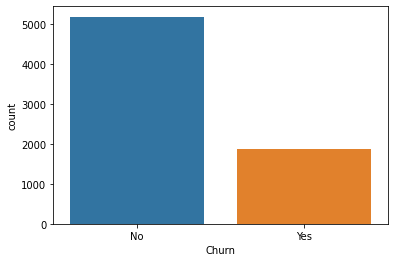

In [130]:
sns.countplot(df_homework_clean['Churn'])

Dari hasil visualisasi diperoleh sebagian besar pelanggan tidak melakukan churn.

Melakukan visualisasi untuk melihat jumlah *costumer chur*n berdasarkan gender.

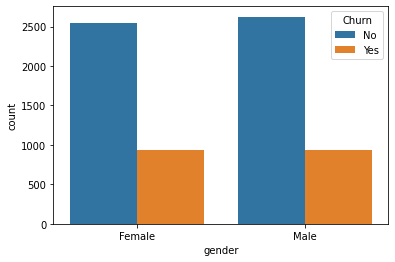

In [131]:
sns.countplot(x ='gender', hue='Churn', data=df_homework_clean)

Dari hasil visualisasi diperoleh bahwa costumer yang paling banyak melakukan churn yaitu pada gender *female*.

##**3. Handle Outlier**

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

Untuk *Handle Outlier* saya menggunakan metode IQR

In [151]:
#Untuk memisahkan data untuk dilakukan Handle Outlier, maka dibuat dataframe baru dari df_homework_clean
df_homework_Outlier = df_homework_clean

In [152]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


###3.1 Kolom 'SeniorCitizen'

In [153]:
df_homework_Outlier['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

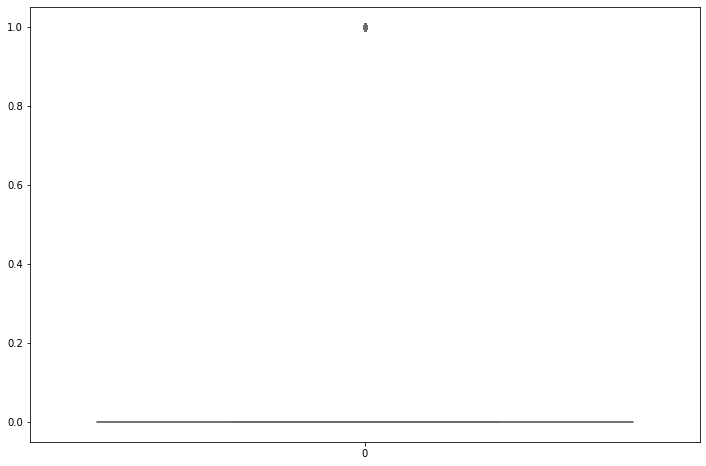

In [154]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['SeniorCitizen'],palette="husl")
plt.show()

In [155]:
df_homework_Outlier['SeniorCitizen'].value_counts(normalize = True)

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

Berdasarkan hasil analisa dan pertimbangan dari karakteristik kolom yaitu Yes dan No yang sudah dikategorikan sebagai 1 dan 0. Maka kolom ini tidak memiliki outlier.

###3.2 Kolom 'tenure'

In [156]:
df_homework_Outlier['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

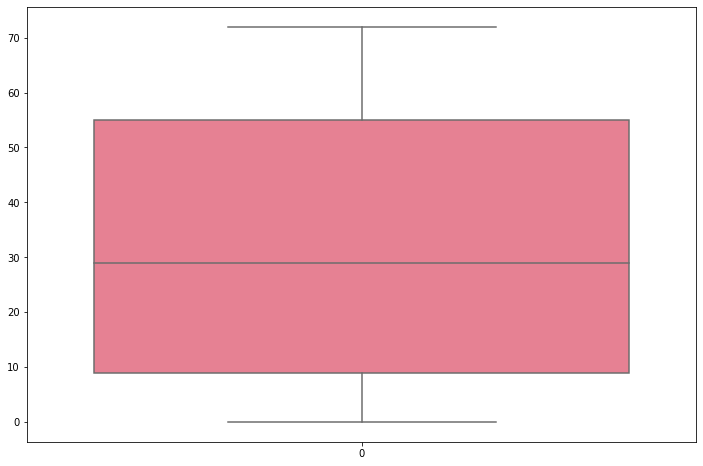

In [157]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['tenure'],palette="husl")
plt.show()

In [158]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [159]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['tenure'].quantile(0.25)
Q3 = df_homework_Outlier['tenure'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['tenure'] >= lower_boundary) & (df_homework_Outlier['tenure'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [160]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


Kolom 'tenure' tidak memiliki outlier ketika menggunakan metode IQR

###3.3 Kolom 'MonthlyCharges	'

In [161]:
df_homework_Outlier['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

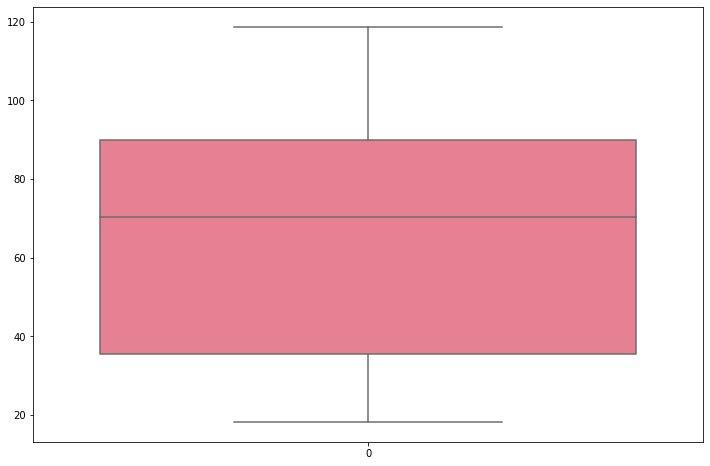

In [162]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['MonthlyCharges'],palette="husl")
plt.show()

In [163]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [164]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['MonthlyCharges'].quantile(0.25)
Q3 = df_homework_Outlier['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['MonthlyCharges'] >= lower_boundary) & (df_homework_Outlier['MonthlyCharges'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [165]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


Kolom 'MonthlyCharges' tidak memiliki outlier ketika menggunakan metode IQR

###3.4 Kolom 'TotalCharges'

In [166]:
df_homework_Outlier['TotalCharges'].describe()

count    7043.000000
mean     2283.277684
std      2265.000331
min        18.800000
25%       402.225000
50%      1400.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Dari hasil analisa pertama, dapat dilihat perbedaan yang signifikan antara mean dan median pada kolom 'TotalCharges'

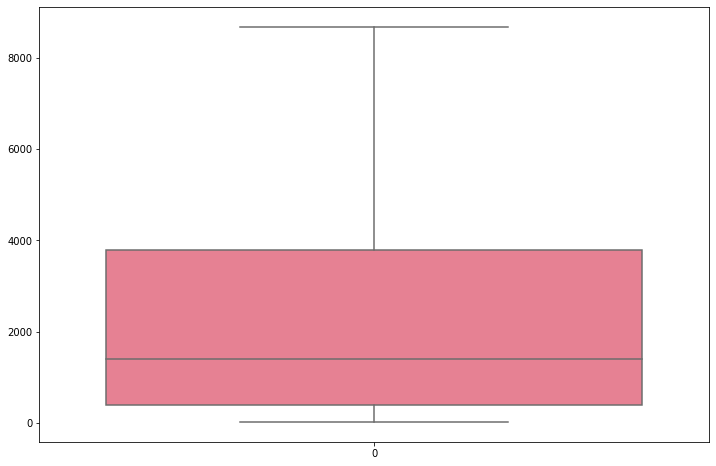

In [167]:
#Boxplot before
plt.figure(figsize=(12,8))
sns.boxplot(data=df_homework_Outlier['TotalCharges'],palette="husl")
plt.show()

In [168]:
print(f"Data Dimension before IQR Method: {df_homework_Outlier.shape}")

Data Dimension before IQR Method: (7043, 21)


In [169]:
# Lets take Absence variable as the threshold

# IQR Calculation and its boundary
Q1 = df_homework_Outlier['TotalCharges'].quantile(0.25)
Q3 = df_homework_Outlier['TotalCharges'].quantile(0.75)
IQR = Q3 - Q1
lower_boundary = Q1 - (1.5 * IQR)
upper_boundary = Q3 + (1.5 * IQR)

# Create filter logic of IQR
filter_logic = (df_homework_Outlier['TotalCharges'] >= lower_boundary) & (df_homework_Outlier['TotalCharges'] <= upper_boundary)

# Apply the filter
df_homework_Outlier = df_homework_Outlier[filter_logic]

In [170]:
print(f"Data Dimension after IQR Method: {df_homework_Outlier.shape}")

Data Dimension after IQR Method: (7043, 21)


In [171]:
Q3 = df_homework_Outlier['TotalCharges'].quantile(0.75)
print(Q3)
upper_boundary = Q3 + (1.5 * IQR)
print(upper_boundary)

3786.6
8863.1625


Untuk memastikan asumsi diawal bahwa, pada kolom 'TotalCharges' memiliki nilai yang signifikan antara mean dan median. Maka dilakukan pengujian manual dengan melihat nilai 'Upper_boundary', dan hasilnya nilai upper_boundary = 8863.1625, dan nilai max = 8684.800000. Maka diambil kesimpulan Kolom 'MonthlyCharges' tidak memiliki outlier ketika menggunakan metode IQR

## **4. Feature Transformation**

In [390]:
#Membuat data frame baru untuk dimodifikasi pada bagian 'Feature Transformation'
df_homework_ft = df_homework_Outlier

###4.1 Numberical

In [391]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [392]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

####3.1.1 Kolom 'SeniorCitizen' (Menggubah ke tipe data categorical)

Pada kolom 'SeniorCitizen' tidak dilakukan *feature tranformation* secara langsung, karena jika dilihat dari karakeristik maka kolom 'SeniorCitizen' merupakan tipe data kategorical. Maka saya akan melakukan *handle missing value* lanjutan untuk tabel tersebut, dengan mengubah kolom SeniorCitizen menjadi data categorical.

In [393]:
df_homework_ft['SeniorCitizen'] = df_homework_ft['SeniorCitizen'].replace([0,1],['No','Yes'])
print(df_homework_ft['SeniorCitizen'])

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object


In [394]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


Kolom 'SeniorCitizen' telah menjadi data cateogorical. Proses One Hot Encoding akan dilakukan pada bagian data kategorical.

####3.1.2 Kolom 'Tenure'

In [395]:
df_homework_ft['tenure'].sample(25)

406     0.833333
1559    0.027778
5920    0.361111
6134    0.083333
1180    0.541667
3553    0.861111
3161    0.194444
3801    0.250000
2142    0.291667
3195    0.125000
4096    0.277778
3055    0.680556
2062    0.916667
5011    0.597222
4451    0.625000
4626    0.875000
1990    0.222222
4062    0.013889
3179    0.375000
98      0.722222
4575    0.055556
2658    0.194444
6531    0.347222
2271    0.555556
2921    0.125000
Name: tenure, dtype: float64

In [396]:
df_homework_ft['tenure'].value_counts()

0.013889    613
1.000000    362
0.027778    238
0.041667    200
0.055556    176
           ... 
0.388889     57
0.541667     56
0.611111     51
0.500000     50
0.000000     11
Name: tenure, Length: 73, dtype: int64

In [397]:
print(df_homework_ft['tenure'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['tenure'].tolist()[:20]}")

count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64
Data sebelum dilakukan tranformasi: [0.013888888888888888, 0.4722222222222222, 0.027777777777777776, 0.625, 0.027777777777777776, 0.1111111111111111, 0.3055555555555555, 0.1388888888888889, 0.38888888888888884, 0.861111111111111, 0.18055555555555555, 0.2222222222222222, 0.8055555555555555, 0.6805555555555555, 0.3472222222222222, 0.9583333333333333, 0.7222222222222222, 0.986111111111111, 0.1388888888888889, 0.29166666666666663]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [398]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['tenure'] = minmax_scaler.fit_transform(df_homework_ft['tenure'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['tenure'].tolist()[:20]}")
df_homework_ft['tenure'].describe()

Data sesudah dilakukan tranformasi: [0.013888888888888888, 0.4722222222222222, 0.027777777777777776, 0.625, 0.027777777777777776, 0.1111111111111111, 0.3055555555555555, 0.1388888888888889, 0.38888888888888884, 0.861111111111111, 0.18055555555555555, 0.2222222222222222, 0.8055555555555555, 0.6805555555555555, 0.3472222222222222, 0.9583333333333333, 0.7222222222222222, 0.986111111111111, 0.1388888888888889, 0.29166666666666663]


count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64

In [399]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


####3.1.3 Kolom 'MonthlyCharges'

In [400]:
df_homework_ft['MonthlyCharges'].sample(25)

1396    0.813930
1454    0.023881
5050    0.873632
6517    0.364179
2057    0.606468
5487    0.018905
5030    0.758706
3464    0.652736
1979    0.017413
812     0.069652
3829    0.823383
6244    0.803980
3945    0.159204
6437    0.066169
1703    0.173134
1880    0.674129
6643    0.560697
3357    0.407463
798     0.017413
587     0.018408
4236    0.016915
676     0.062687
5583    0.663682
1775    0.903483
1555    0.874129
Name: MonthlyCharges, dtype: float64

In [401]:
df_homework_ft['MonthlyCharges'].value_counts()

0.017910    61
0.015920    45
0.016915    44
0.016418    44
0.017413    43
            ..
0.053731     1
0.959701     1
0.252736     1
0.692040     1
0.601493     1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [402]:
print(df_homework_ft['MonthlyCharges'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['MonthlyCharges'].tolist()[:20]}")

count    7043.000000
mean        0.462803
std         0.299403
min         0.000000
25%         0.171642
50%         0.518408
75%         0.712438
max         1.000000
Name: MonthlyCharges, dtype: float64
Data sebelum dilakukan tranformasi: [0.11542288557213934, 0.38507462686567173, 0.3542288557213931, 0.2393034825870647, 0.5218905472636817, 0.8099502487562191, 0.7049751243781095, 0.11442786069651742, 0.8611940298507464, 0.3771144278606966, 0.3154228855721394, 0.006965174129353215, 0.8169154228855723, 0.8502487562189057, 0.8681592039800997, 0.9452736318407963, 0.02388059701492535, 0.8800995024875625, 0.3676616915422886, 0.7144278606965174]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [403]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['MonthlyCharges'] = minmax_scaler.fit_transform(df_homework_ft['MonthlyCharges'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['MonthlyCharges'].tolist()[:20]}")
df_homework_ft['MonthlyCharges'].describe()

Data sesudah dilakukan tranformasi: [0.11542288557213934, 0.38507462686567173, 0.3542288557213931, 0.2393034825870647, 0.5218905472636817, 0.8099502487562191, 0.7049751243781095, 0.11442786069651742, 0.8611940298507464, 0.3771144278606966, 0.3154228855721394, 0.006965174129353215, 0.8169154228855723, 0.8502487562189057, 0.8681592039800997, 0.9452736318407963, 0.02388059701492535, 0.8800995024875625, 0.3676616915422886, 0.7144278606965174]


count    7043.000000
mean        0.462803
std         0.299403
min         0.000000
25%         0.171642
50%         0.518408
75%         0.712438
max         1.000000
Name: MonthlyCharges, dtype: float64

In [404]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


####3.1.4 Kolom 'TotalCharges'

In [405]:
df_homework_ft['TotalCharges'].sample(25)

5805    0.146232
5756    0.118948
6939    0.373009
2529    0.319952
6196    0.855291
4358    0.099071
4998    0.811741
5687    0.445823
6758    0.050940
5803    0.045869
3576    0.185132
819     0.688628
2558    0.076090
89      0.114291
5018    0.157051
1347    0.040930
3137    0.511822
5734    0.733643
964     0.003104
4677    0.112174
6261    0.147536
2676    0.069069
5971    0.156404
6722    0.822029
1995    0.005902
Name: TotalCharges, dtype: float64

In [406]:
df_homework_ft['TotalCharges'].value_counts()

0.259627    11
0.000162    11
0.000110     9
0.000144     8
0.000127     8
            ..
0.788207     1
0.077723     1
0.012849     1
0.368463     1
0.787641     1
Name: TotalCharges, Length: 6531, dtype: int64

In [407]:
print(df_homework_ft['TotalCharges'].describe())

print(f"Data sebelum dilakukan tranformasi: {df_homework_ft['TotalCharges'].tolist()[:20]}")

count    7043.000000
mean        0.261306
std         0.261366
min         0.000000
25%         0.044245
50%         0.159445
75%         0.434780
max         1.000000
Name: TotalCharges, dtype: float64
Data sebelum dilakukan tranformasi: [0.0012750980844680362, 0.2158666051234711, 0.010310408492961, 0.21024117239787682, 0.015330025386568202, 0.0925109623817217, 0.22277867528271414, 0.03266789753057928, 0.34932494807292874, 0.4003173321024695, 0.06561850911608588, 0.03554119547657513, 0.6533925686591278, 0.5789868451419341, 0.3077832910223864, 0.9088795291945536, 0.11587237479806144, 0.8496942072467115, 0.05879875375028851, 0.21279713824140326]


Menggunakan metode scaling untuk melakukan feature transformation pada kolom 'tenure'.

In [408]:
# Feature Scaling (n - m)

# As an example, value range is between 0 - 1
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply the scaler to our data
df_homework_ft['TotalCharges'] = minmax_scaler.fit_transform(df_homework_ft['TotalCharges'].values.reshape(len(df_homework_ft), 1))

# Show the data
print(f"Data sesudah dilakukan tranformasi: {df_homework_ft['TotalCharges'].tolist()[:20]}")
df_homework_ft['TotalCharges'].describe()

Data sesudah dilakukan tranformasi: [0.0012750980844680362, 0.2158666051234711, 0.010310408492961, 0.21024117239787682, 0.015330025386568202, 0.0925109623817217, 0.22277867528271414, 0.03266789753057928, 0.34932494807292874, 0.4003173321024695, 0.06561850911608588, 0.03554119547657513, 0.6533925686591278, 0.5789868451419341, 0.3077832910223864, 0.9088795291945536, 0.11587237479806144, 0.8496942072467115, 0.05879875375028851, 0.21279713824140326]


count    7043.000000
mean        0.261306
std         0.261366
min         0.000000
25%         0.044245
50%         0.159445
75%         0.434780
max         1.000000
Name: TotalCharges, dtype: float64

In [409]:
df_numerical2 = df_homework_Outlier.select_dtypes(include=["int","float"]) #Mengambil kolom yang sifatnya data numerik
df_numerical2.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


###4.2 Categorical (Encoding)

In [410]:
df_categorical2 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes


In [411]:
df_homework_ft_encoding = df_homework_ft

####4.2.1 Kolom 'gender'

In [412]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['gender'].value_counts().reset_index()

,index,gender
0,Male,3555
1,Female,3488


In [413]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['gender'])
df_homework_ft_encoding.iloc[0]

customerID               7590-VHVEG
SeniorCitizen                    No
Partner                         Yes
Dependents                       No
tenure                     0.013889
PhoneService                     No
MultipleLines                    No
InternetService                 DSL
OnlineSecurity                   No
OnlineBackup                    Yes
DeviceProtection                 No
TechSupport                      No
StreamingTV                      No
StreamingMovies                  No
Contract             Month-to-month
PaperlessBilling                Yes
PaymentMethod       Bank Withdrawal
MonthlyCharges             0.115423
TotalCharges               0.001275
Churn                            No
gender_Female                     1
gender_Male                       0
Name: 0, dtype: object

In [414]:
df_categorical3 = df_homework_ft_encoding.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,7590-VHVEG,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0
1,5575-GNVDE,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1
2,3668-QPYBK,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1
3,7795-CFOCW,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1
4,9237-HQITU,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0


In [415]:
 df_homework_ft = df_homework_ft_encoding['gender_Female'].replace(['1','0'],[1,0])

In [416]:
df_homework_ft_encoding['gender_Male'].sum()

3555

In [417]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [418]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male
0,7590-VHVEG,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0
1,5575-GNVDE,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1
2,3668-QPYBK,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1
3,7795-CFOCW,No,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1
4,9237-HQITU,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0


####4.2.2 Kolom 'SeniorCitizen'

In [419]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['SeniorCitizen'].value_counts().reset_index()

,index,SeniorCitizen
0,No,5901
1,Yes,1142


In [420]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['SeniorCitizen'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
Partner                          Yes
Dependents                        No
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Name: 0, dtype: object

In [421]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [422]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes
0,7590-VHVEG,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0
1,5575-GNVDE,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,1,1,0
2,3668-QPYBK,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0
3,7795-CFOCW,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,1,0
4,9237-HQITU,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0


####4.2.3 Kolom 'Partner'

In [423]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['Partner'].value_counts().reset_index()

,index,Partner
0,No,3641
1,Yes,3402


In [424]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['Partner'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
Dependents                        No
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Name: 0, dtype: object

In [425]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [426]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes
0,7590-VHVEG,No,No,No,DSL,No,Yes,No,No,No,...,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,1
1,5575-GNVDE,No,Yes,No,DSL,Yes,No,Yes,No,No,...,One year,No,Mailed check,No,0,1,1,0,1,0
2,3668-QPYBK,No,Yes,No,DSL,Yes,Yes,No,No,No,...,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,0
3,7795-CFOCW,No,No,No,DSL,Yes,No,Yes,Yes,No,...,One year,No,Bank Withdrawal,No,0,1,1,0,1,0
4,9237-HQITU,No,Yes,No,Fiber optic,No,No,No,No,No,...,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0


####4.4.4 Kolom 'Dependents'

In [427]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['Dependents'].value_counts().reset_index()

,index,Dependents
0,No,4933
1,Yes,2110


In [428]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['Dependents'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
PhoneService                      No
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
Name: 0, dtype: object

In [429]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [430]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,...,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,7590-VHVEG,No,No,DSL,No,Yes,No,No,No,No,...,Bank Withdrawal,No,1,0,1,0,0,1,1,0
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No,...,Mailed check,No,0,1,1,0,1,0,1,0
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No,...,Mailed check,Yes,0,1,1,0,1,0,1,0
3,7795-CFOCW,No,No,DSL,Yes,No,Yes,Yes,No,No,...,Bank Withdrawal,No,0,1,1,0,1,0,1,0
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No,...,Bank Withdrawal,Yes,1,0,1,0,1,0,1,0


####4.4.5 Kolom 'PhoneService'

In [431]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PhoneService'].value_counts().reset_index()

,index,PhoneService
0,Yes,6361
1,No,682


In [432]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PhoneService'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
MultipleLines                     No
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
PhoneService_No                    1
PhoneService_Yes                   0
Name: 0, dtype: object

In [433]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [434]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,...,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes
0,7590-VHVEG,No,DSL,No,Yes,No,No,No,No,Month-to-month,...,1,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No,One year,...,0,1,1,0,1,0,1,0,0,1
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,...,0,1,1,0,1,0,1,0,0,1
3,7795-CFOCW,No,DSL,Yes,No,Yes,Yes,No,No,One year,...,0,1,1,0,1,0,1,0,1,0
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No,Month-to-month,...,1,0,1,0,1,0,1,0,0,1


####4.4.6 Kolom 'MultipleLines'

In [435]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['MultipleLines'].value_counts().reset_index()

,index,MultipleLines
0,No,4072
1,Yes,2971


In [436]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['MultipleLines'])
df_homework_ft_encoding.iloc[0]

customerID                7590-VHVEG
tenure                      0.013889
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod        Bank Withdrawal
MonthlyCharges              0.115423
TotalCharges                0.001275
Churn                             No
gender_Female                      1
gender_Male                        0
SeniorCitizen_No                   1
SeniorCitizen_Yes                  0
Partner_No                         0
Partner_Yes                        1
Dependents_No                      1
Dependents_Yes                     0
PhoneService_No                    1
PhoneService_Yes                   0
MultipleLines_No                   1
MultipleLines_Yes                  0
N

In [437]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [438]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,...,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No,One year,No,...,1,0,1,0,1,0,0,1,1,0
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,...,1,0,1,0,1,0,0,1,1,0
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,One year,No,...,1,0,1,0,1,0,1,0,1,0
4,9237-HQITU,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,...,1,0,1,0,1,0,0,1,1,0


####4.4.7 Kolom 'InternetService'

In [439]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['InternetService'].value_counts().reset_index()

,index,InternetService
0,Fiber optic,3096
1,DSL,2421
2,No,1526


In [440]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['InternetService'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
OnlineSecurity                              No
OnlineBackup                               Yes
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Ye

In [441]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [442]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,...,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,No,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,...,1,1,0,1,0,1,0,1,0,0
1,5575-GNVDE,Yes,No,Yes,No,No,No,One year,No,Mailed check,...,0,1,0,0,1,1,0,1,0,0
2,3668-QPYBK,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,...,0,1,0,0,1,1,0,1,0,0
3,7795-CFOCW,Yes,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,...,0,1,0,1,0,1,0,1,0,0
4,9237-HQITU,No,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,...,0,1,0,0,1,1,0,0,1,0


####4.4.8 Kolom 'OnlineSecurity'

In [443]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['OnlineSecurity'].value_counts().reset_index()

,index,OnlineSecurity
0,No,5024
1,Yes,2019


In [444]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['OnlineSecurity'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
OnlineBackup                               Yes
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_

In [445]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [446]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,...,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,...,0,1,0,1,0,1,0,0,1,0
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,No,...,0,0,1,1,0,1,0,0,0,1
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,...,0,0,1,1,0,1,0,0,0,1
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,...,0,1,0,1,0,1,0,0,0,1
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,...,0,0,1,1,0,0,1,0,1,0


####4.4.9 Kolom 'OnlineBackup'

In [447]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['OnlineBackup'].value_counts().reset_index()

,index,OnlineBackup
0,No,4614
1,Yes,2429


In [448]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['OnlineBackup'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
DeviceProtection                            No
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_

In [449]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [450]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,...,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes
0,7590-VHVEG,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,...,0,1,0,1,0,0,1,0,0,1
1,5575-GNVDE,Yes,No,No,No,One year,No,Mailed check,No,0,...,1,1,0,1,0,0,0,1,1,0
2,3668-QPYBK,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,...,1,1,0,1,0,0,0,1,0,1
3,7795-CFOCW,Yes,Yes,No,No,One year,No,Bank Withdrawal,No,0,...,0,1,0,1,0,0,0,1,1,0
4,9237-HQITU,No,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,...,1,1,0,0,1,0,1,0,1,0


####4.4.10 Kolom 'DeviceProtection'

In [451]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['DeviceProtection'].value_counts().reset_index()

,index,DeviceProtection
0,No,4621
1,Yes,2422


In [452]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['DeviceProtection'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
TechSupport                                 No
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines

In [453]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [454]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes
0,7590-VHVEG,No,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,...,0,1,0,0,1,0,0,1,1,0
1,5575-GNVDE,No,No,No,One year,No,Mailed check,No,0,1,...,0,1,0,0,0,1,1,0,0,1
2,3668-QPYBK,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,...,0,1,0,0,0,1,0,1,1,0
3,7795-CFOCW,Yes,No,No,One year,No,Bank Withdrawal,No,0,1,...,0,1,0,0,0,1,1,0,0,1
4,9237-HQITU,No,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,...,0,0,1,0,1,0,1,0,1,0


####4.4.11 Kolom 'TechSupport'

In [455]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['TechSupport'].value_counts().reset_index()

,index,TechSupport
0,No,4999
1,Yes,2044


In [456]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['TechSupport'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
StreamingTV                                 No
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines

In [457]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [458]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,...,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes
0,7590-VHVEG,No,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,...,0,0,1,0,0,1,1,0,1,0
1,5575-GNVDE,No,No,One year,No,Mailed check,No,0,1,1,...,0,0,0,1,1,0,0,1,1,0
2,3668-QPYBK,No,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,...,0,0,0,1,0,1,1,0,1,0
3,7795-CFOCW,No,No,One year,No,Bank Withdrawal,No,0,1,1,...,0,0,0,1,1,0,0,1,0,1
4,9237-HQITU,No,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,...,1,0,1,0,1,0,1,0,1,0


####4.4.12 Kolom 'StreamingTV'

In [459]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['StreamingTV'].value_counts().reset_index()

,index,StreamingTV
0,No,4336
1,Yes,2707


In [460]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['StreamingTV'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
StreamingMovies                             No
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetServi

In [461]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [462]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,No,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,No,One year,No,Mailed check,No,0,1,1,0,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,No,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,...,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,No,One year,No,Bank Withdrawal,No,0,1,1,0,...,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,No,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


####4.4.13 Kolom 'StreamingMovies'

In [463]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['StreamingMovies'].value_counts().reset_index()

,index,StreamingMovies
0,No,4311
1,Yes,2732


In [464]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['StreamingMovies'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
Contract                        Month-to-month
PaperlessBilling                           Yes
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetService_DSL                          1
InternetServi

In [465]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [466]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Contract,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Month-to-month,Yes,Bank Withdrawal,No,1,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,One year,No,Mailed check,No,0,1,1,0,1,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,Yes,0,1,1,0,1,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,One year,No,Bank Withdrawal,No,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Month-to-month,Yes,Bank Withdrawal,Yes,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


####4.4.14 Kolom 'Contract'

In [467]:
df_homework_ft['Contract'].value_counts().reset_index()

,index,Contract
0,Month-to-month,3875
1,Two year,1695
2,One year,1473


Karena kateogri ini memiliki perbedaan, hal ini dapat dilihat bahwa Bula lebih rendah dari 1 tahun dan 2 tahun lebih tinggi dari 1 tahun dan 1 bulan. Maka pada kolom ini menggunakan metode Ordinal Encoding

In [468]:
# Use .map(class) to replace value by value using dictionary

Contract_class = {"Month-to-month": 1, 
                   "One year": 2,
                   "Two year": 3}


df_homework_ft_encoding['Contract_class'] = df_homework_ft_encoding['Contract'].map(Contract_class)
df_homework_ft_encoding[['Contract_class','Contract']].sample(10)

,Contract_class,Contract
6369,3,Two year
6291,2,One year
5626,1,Month-to-month
5581,3,Two year
5128,1,Month-to-month
1088,1,Month-to-month
5270,1,Month-to-month
1346,1,Month-to-month
4843,3,Two year
5103,2,One year


In [469]:
df_homework_ft_encoding.head()

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class
0,7590-VHVEG,0.013889,Month-to-month,Yes,Bank Withdrawal,0.115423,0.001275,No,1,0,...,1,1,0,1,0,1,0,1,0,1
1,5575-GNVDE,0.472222,One year,No,Mailed check,0.385075,0.215867,No,0,1,...,0,0,1,1,0,1,0,1,0,2
2,3668-QPYBK,0.027778,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes,0,1,...,1,1,0,1,0,1,0,1,0,1
3,7795-CFOCW,0.625000,One year,No,Bank Withdrawal,0.239303,0.210241,No,0,1,...,0,0,1,0,1,1,0,1,0,2
4,9237-HQITU,0.027778,Month-to-month,Yes,Bank Withdrawal,0.521891,0.015330,Yes,1,0,...,0,1,0,1,0,1,0,1,0,1


In [470]:
df_homework_ft_encoding = df_homework_ft_encoding.drop('Contract', axis=1)

In [471]:
df_homework_ft_encoding.head()

,customerID,tenure,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class
0,7590-VHVEG,0.013889,Yes,Bank Withdrawal,0.115423,0.001275,No,1,0,1,...,1,1,0,1,0,1,0,1,0,1
1,5575-GNVDE,0.472222,No,Mailed check,0.385075,0.215867,No,0,1,1,...,0,0,1,1,0,1,0,1,0,2
2,3668-QPYBK,0.027778,Yes,Mailed check,0.354229,0.010310,Yes,0,1,1,...,1,1,0,1,0,1,0,1,0,1
3,7795-CFOCW,0.625000,No,Bank Withdrawal,0.239303,0.210241,No,0,1,1,...,0,0,1,0,1,1,0,1,0,2
4,9237-HQITU,0.027778,Yes,Bank Withdrawal,0.521891,0.015330,Yes,1,0,1,...,0,1,0,1,0,1,0,1,0,1


Kolom 'Contract' berhasil dihapus

In [472]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [473]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PaperlessBilling,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Yes,Bank Withdrawal,No,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,No,Mailed check,No,0,1,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Yes,Mailed check,Yes,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,No,Bank Withdrawal,No,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Yes,Bank Withdrawal,Yes,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


####4.4.15 Kolom 'PaperlessBilling'

In [474]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PaperlessBilling'].value_counts().reset_index()

,index,PaperlessBilling
0,Yes,4171
1,No,2872


In [475]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PaperlessBilling'])
df_homework_ft_encoding.iloc[0]

customerID                          7590-VHVEG
tenure                                0.013889
PaymentMethod                  Bank Withdrawal
MonthlyCharges                        0.115423
TotalCharges                          0.001275
Churn                                       No
gender_Female                                1
gender_Male                                  0
SeniorCitizen_No                             1
SeniorCitizen_Yes                            0
Partner_No                                   0
Partner_Yes                                  1
Dependents_No                                1
Dependents_Yes                               0
PhoneService_No                              1
PhoneService_Yes                             0
MultipleLines_No                             1
MultipleLines_Yes                            0
InternetService_DSL                          1
InternetService_Fiber optic                  0
InternetService_No                           0
OnlineSecurit

In [476]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [477]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,PaymentMethod,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,7590-VHVEG,Bank Withdrawal,No,1,0,1,0,0,1,1,...,1,0,1,0,1,0,1,0,0,1
1,5575-GNVDE,Mailed check,No,0,1,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,0
2,3668-QPYBK,Mailed check,Yes,0,1,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,Bank Withdrawal,No,0,1,1,0,1,0,1,...,0,1,0,1,1,0,1,0,1,0
4,9237-HQITU,Bank Withdrawal,Yes,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,0,1


####4.4.16 Kolom 'PaymentMethod'

In [478]:
# 1. One-hot Encoding applied for nominal data scale
df_homework_ft['PaymentMethod'].value_counts().reset_index()

,index,PaymentMethod
0,Bank Withdrawal,3909
1,Mailed check,1612
2,Credit Card,1522


In [479]:
# Use pd.get_dummies(data frame) to apply one-hot encoding
df_homework_ft_encoding = pd.get_dummies(df_homework_ft,columns = ['PaymentMethod'])
df_homework_ft_encoding.iloc[0]

customerID                       7590-VHVEG
tenure                             0.013889
MonthlyCharges                     0.115423
TotalCharges                       0.001275
Churn                                    No
gender_Female                             1
gender_Male                               0
SeniorCitizen_No                          1
SeniorCitizen_Yes                         0
Partner_No                                0
Partner_Yes                               1
Dependents_No                             1
Dependents_Yes                            0
PhoneService_No                           1
PhoneService_Yes                          0
MultipleLines_No                          1
MultipleLines_Yes                         0
InternetService_DSL                       1
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No                         1
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [480]:
#Save perubahan 
df_homework_ft = df_homework_ft_encoding

In [481]:
df_categorical3 = df_homework_ft.select_dtypes(exclude=["int","float"])
df_categorical3.head()

,customerID,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check
0,7590-VHVEG,No,1,0,1,0,0,1,1,0,...,0,1,0,1,0,0,1,1,0,0
1,5575-GNVDE,No,0,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,1
2,3668-QPYBK,Yes,0,1,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
3,7795-CFOCW,No,0,1,1,0,1,0,1,0,...,1,1,0,1,0,1,0,1,0,0
4,9237-HQITU,Yes,1,0,1,0,1,0,1,0,...,0,1,0,1,0,0,1,1,0,0


In [483]:
df_homework_ft.head(5)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check
0,7590-VHVEG,0.013889,0.115423,0.001275,No,1,0,1,0,0,...,1,0,1,0,1,0,1,1,0,0
1,5575-GNVDE,0.472222,0.385075,0.215867,No,0,1,1,0,1,...,1,0,1,0,2,1,0,0,0,1
2,3668-QPYBK,0.027778,0.354229,0.010310,Yes,0,1,1,0,1,...,1,0,1,0,1,0,1,0,0,1
3,7795-CFOCW,0.625000,0.239303,0.210241,No,0,1,1,0,1,...,1,0,1,0,2,1,0,1,0,0
4,9237-HQITU,0.027778,0.521891,0.015330,Yes,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,0


#### 4.4.17: Kolom 'Churn'

In [486]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

In [489]:
le = preprocessing.LabelEncoder()
le.fit(df_homework_ft['Churn'])
df_homework_ft['Churn_Ecod'] = le.transform(df_homework_ft['Churn']) 

In [491]:
df_homework_ft.head(4)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_Ecod
0,7590-VHVEG,0.013889,0.115423,0.001275,No,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,0
1,5575-GNVDE,0.472222,0.385075,0.215867,No,0,1,1,0,1,...,0,1,0,2,1,0,0,0,1,0
2,3668-QPYBK,0.027778,0.354229,0.010310,Yes,0,1,1,0,1,...,0,1,0,1,0,1,0,0,1,1
3,7795-CFOCW,0.625000,0.239303,0.210241,No,0,1,1,0,1,...,0,1,0,2,1,0,1,0,0,0


## **5. Pemodelan**

In [498]:
df_ML = df_homework_ft


In [499]:
df_ML = df_ML.drop('customerID', axis = 1)
df_ML.head(5)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_Ecod
0,0.013889,0.115423,0.001275,No,1,0,1,0,0,1,...,0,1,0,1,0,1,1,0,0,0
1,0.472222,0.385075,0.215867,No,0,1,1,0,1,0,...,0,1,0,2,1,0,0,0,1,0
2,0.027778,0.354229,0.010310,Yes,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,1
3,0.625000,0.239303,0.210241,No,0,1,1,0,1,0,...,0,1,0,2,1,0,1,0,0,0
4,0.027778,0.521891,0.015330,Yes,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1


In [500]:
df_ML = df_ML.drop('Churn', axis = 1)
df_ML.head(5)

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_class,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank Withdrawal,PaymentMethod_Credit Card,PaymentMethod_Mailed check,Churn_Ecod
0,0.013889,0.115423,0.001275,1,0,1,0,0,1,1,...,0,1,0,1,0,1,1,0,0,0
1,0.472222,0.385075,0.215867,0,1,1,0,1,0,1,...,0,1,0,2,1,0,0,0,1,0
2,0.027778,0.354229,0.010310,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,1,1
3,0.625000,0.239303,0.210241,0,1,1,0,1,0,1,...,0,1,0,2,1,0,1,0,0,0
4,0.027778,0.521891,0.015330,1,0,1,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1


### 5.1 Melakukan Scale Data

In [501]:
#Scaled the data
x = df_ML.drop('Churn_Ecod', axis=1)
y = df_ML['Churn_Ecod']
x = StandardScaler().fit_transform(x)

### 5.2 Melakukan Split Data

In [502]:
#Split the data into 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=1)

### 5.3 Membuat dan melatih model

In [503]:
model = LogisticRegression()
# Train the model
model.fit(xtrain, ytrain)

LogisticRegression()

### 5.4 Membuat prediksi pada data pengujian

In [504]:
predictions = model.predict(xtest)

# print the predictions
print(predictions)

[0 0 0 ... 0 0 1]


### Evaluasi model

In [505]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1061
           1       0.62      0.59      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409



Precision = 0.62; Recall = 0.59; F1-Score = 0.60

##**6. Kesimpulan & Saran**

Pada Data telco_churn dibuat model Prediction menggunakan LogisticRegression, dan dari hasil pelatihan dan test model. Ditemukan pada model yang dibuat memiliki Precision sebesar 62%, Recall sebesar 59% dan F1-score sebesar 60%. Dari hasil tesebut, disimpulkan bahwa model tersebut belum optimal, sehingga diperlukan pembuatan model dengan alogoritma lain untuk menguji tingkat keberhasilan model.